#  Basic neural network in Keras. Fashion MNIST

#### Objective:

Model and train a neural network using Keras in order to classify the elements of a dataset correctly.

#### Install dependencies.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

#### Load the dataset from keras.

In [ ]:
(x_train, y_train), (x_test, y_test)= keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Shape of the train samples and the train labels

In [ ]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Category dictionary:

A dictionary with the corresponding values of each category.

In [ ]:
mnist_classes= {0:"T-shirt/top",
                1:"Trouser",
                2:"Pullover",
                3:"Dress",
                4:"Coat",
                5:"Sandal",
                6:"Shirt",
                7:"Sneaker",
                8:"Bag",
                9:"Ankle boot"}

#### Plotting a sample:

A sample of the training set is plotted as a reference of the images. The sample is chosen randomly and it shows its corresponding category.

In [ ]:
sample = np.random.randint(0, x_train.shape[0])

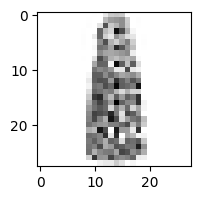

In [ ]:
plt.figure(figsize = (2,2))
mnist_img = x_train[sample]
plt.imshow(mnist_img,cmap="Greys")
ax = plt.gca()

In [ ]:
print(mnist_classes[y_train[sample]])

Dress


#### Data preprocessing.
It is necesseray to preprocess the data in order to feed the neural network with the appropriate format.

Since the model arquitecture is a simple one consisting of
a couple of sequential dense layers, the data needs to be reshaped to fit the input shape; in this case instead of a two dimensional format, reshaping the images to a flatten shape of one dimension (28*28=784) will allow the model to process the data with the neurons of the network.

The format of the labels is also changed to a one-hot encoding that allows to use the 'sparse_categorical_crossentropy' loss function.

In [ ]:
n_classes=10
keras.utils.to_categorical(y_train, n_classes)
keras.utils.to_categorical(y_test, n_classes)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255

#### Neural network model

A sequential model with two hidden layers. The purpose of this exercise is to use a simple neural network to classify the images.

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

model.add(keras.layers.Dense(32, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

#### Summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 13434 (52.48 KB)
Trainable params: 13434 (52.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The output of the model's summary shows that it is a very simple model with only 13434 parameters to train. This is a very small quatity compared to the millions other arquitectures have; of course those are more accurate and trained for more complex tasks or difficult problems. However the simple arquitecture of the model presented here really shows the capabilities of deep learning.

#### Compile and train the model.

To compile the model the sparse categorical crossentropy, adam and accuracy where used as loss function, as optimizer and metrics respectively.



In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

To train the model 25 epochs are more than enough for the neural network to capture the necessary features.

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=25,
          verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
469/469 [==============================] - 7s 10ms/step - loss: 0.7337 - accuracy: 0.7430 - val_loss: 0.5171 - val_accuracy: 0.8179
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4574 - accuracy: 0.8378 - val_loss: 0.4582 - val_accuracy: 0.8364
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4143 - accuracy: 0.8535 - val_loss: 0.4389 - val_accuracy: 0.8410
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3917 - accuracy: 0.8599 - val_loss: 0.4183 - val_accuracy: 0.8503
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.8660 - val_loss: 0.4032 - val_accuracy: 0.8555
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3662 - accuracy: 0.8684 - val_loss: 0.4026 - val_accuracy: 0.8541
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.3580 - accuracy: 0.8714 - val_loss: 0.3987 - val_accuracy: 0.8588
Epoch

#### Model's evaluation.

The model's evalution outputs an accuracy of 86%. The result might not look impressive at first glance but despite it used few parameters and the images are not very clear the model was still able to achieve a 86% of accuracy.

In [ ]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8659


[0.377964586019516, 0.8658999800682068]

#### Predicting a random image category.

It's time to use the trained model and see if it can predict a random image.

In [ ]:
sample_test = np.random.randint(0, x_test.shape[0])


In [ ]:
np.shape(x_test[sample_test])

(784,)

In [ ]:
x = x_test[sample_test].reshape(1,784)

In [ ]:
result= model.predict(x)

1/1 [==============================] - 0s 137ms/step


The image is predicted and an index of the image is selected to see if it matches the same index of the label.

In [ ]:
prediction= result.argmax()

The prediction outputs "T-shirt/top" and the label of the sample is the exact same which means the prediction is correct. And the end the image is displayed to confirm it is a T-shirt/top

In [ ]:
mnist_classes[prediction]

'T-shirt/top'

In [ ]:
print(mnist_classes[y_test[sample_test]])

T-shirt/top


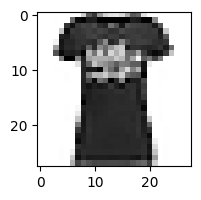

In [ ]:
x_test = x_test.reshape(10000, 28, 28).astype('float32')
plt.figure(figsize = (2,2))
mnist_img = x_test[sample_test]
plt.imshow(mnist_img,cmap="Greys")
ax = plt.gca()